In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut, KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,precision_recall_fscore_support as score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.linear_model as skl_lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
csv1 = pd.read_csv('batch1.dat', sep='\s+', header=None, skiprows=1)
csv2 = pd.read_csv('batch2.dat', sep='\s+', header=None, skiprows=1)
csv3 = pd.read_csv('batch3.dat', sep='\s+', header=None, skiprows=1)
csv4 = pd.read_csv('batch4.dat', sep='\s+', header=None, skiprows=1)
csv5 = pd.read_csv('batch5.dat', sep='\s+', header=None, skiprows=1)
csv6 = pd.read_csv('batch6.dat', sep='\s+', header=None, skiprows=1)
csv7 = pd.read_csv('batch7.dat', sep='\s+', header=None, skiprows=1)
csv8 = pd.read_csv('batch8.dat', sep='\s+', header=None, skiprows=1)
csv9 = pd.read_csv('batch9.dat', sep='\s+', header=None, skiprows=1)
csv10 = pd.read_csv('batch10.dat', sep='\s+', header=None, skiprows=1)

In [6]:
frames = [csv1,csv2,csv3,csv4,csv5,csv6,csv7,csv8,csv9]
training = pd.concat(frames)

frames1 = [csv10]
test = pd.concat(frames1)

In [7]:
training.shape

(10301, 129)

In [8]:
test.shape

(3599, 129)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Columns: 129 entries, 0 to 128
dtypes: float64(128), int64(1)
memory usage: 3.5 MB


In [12]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,3,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,...,-0.622342,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975
1,4,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,...,-7.762551,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895
2,3,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,4301.4033,...,-3.244969,-7.215792,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439
3,4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,...,-5.093413,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591
4,3,6277.2749,1.829743,1.248356,1.742839,4.357035,-1.203431,-1.663068,-5.747398,7778.0552,...,-4.317619,-9.747358,8620.2464,4.587509,3.597882,8.375652,12.083544,-2.024297,-3.536502,-7.403311


In [13]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
count,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,...,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000
mean,3.499861,44536.887458,5.722079,11.385515,16.314872,28.096582,-7.567447,-13.562222,-87.236652,52582.337791,...,-9.408363,-23.252500,15539.920959,6.561365,5.852377,11.556905,16.145749,-4.429755,-8.044536,-18.943997
std,1.708279,57433.415418,4.819574,14.707524,21.711907,48.379565,9.594885,22.841194,204.113751,69519.413337,...,13.645444,40.237352,17610.555127,6.042914,6.002307,10.149264,12.067911,5.844271,11.178874,30.117358
min,1.000000,-1377.306600,0.852502,0.036450,0.269042,2.250820,-46.280557,-162.265230,-1664.735576,-2509.142600,...,-76.069200,-337.288100,-198.476500,0.936072,0.353431,0.673172,3.267195,-30.205911,-58.844076,-215.418100
25%,2.000000,6359.689950,2.093789,2.110526,3.124479,6.071997,-9.705211,-13.174559,-45.167614,11303.174300,...,-9.618488,-19.816648,5383.423850,2.828778,2.143410,4.431191,7.737242,-4.795027,-8.431047,-16.680848
50%,3.000000,24285.308300,3.944274,5.522887,7.542356,11.406871,-3.851079,-5.238129,-14.549900,30858.859400,...,-5.187354,-10.546100,10535.569900,4.689308,4.103705,8.545897,12.506405,-2.698586,-4.667171,-9.238631
75%,5.000000,52373.287350,8.196890,13.855429,19.632736,27.950001,-1.214070,-1.755285,-5.672646,48353.955450,...,-2.033419,-5.859252,17968.505900,7.939533,7.258179,15.600644,20.680768,-1.089123,-1.872206,-5.381551
max,6.000000,282551.562500,29.147021,83.680018,128.112090,664.208067,-0.048260,-0.231926,-1.780013,301411.189400,...,-0.363441,-2.736956,90968.734600,40.159623,32.203601,61.160996,79.152049,-0.070088,-0.341295,-2.176613


In [10]:
corr_matrix = training.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1.000000,0.251017,-0.146240,0.215484,0.198526,0.232759,-0.199865,-0.207538,-0.262370,0.375568,...,0.224304,0.115804,-0.141725,-0.356166,-0.429179,-0.568926,-0.565230,0.192238,0.213304,0.102219
1,0.251017,1.000000,0.159537,0.981239,0.959053,0.898502,-0.990815,-0.944668,-0.844406,0.927833,...,-0.413016,-0.190167,0.496273,0.212015,0.206514,-0.035521,-0.062454,-0.481579,-0.418552,-0.188652
2,-0.146240,0.159537,1.000000,0.187687,0.201212,0.159426,-0.177935,-0.156098,-0.073278,0.156481,...,-0.231722,-0.113989,0.251147,0.220340,0.265805,0.354074,0.201333,-0.253927,-0.238916,-0.115348
3,0.215484,0.981239,0.187687,1.000000,0.991940,0.926058,-0.985093,-0.946126,-0.849844,0.906077,...,-0.465223,-0.227165,0.545395,0.245027,0.272925,0.018176,-0.008934,-0.533970,-0.472475,-0.226056
4,0.198526,0.959053,0.201212,0.991940,1.000000,0.946306,-0.969715,-0.938144,-0.841739,0.881230,...,-0.478354,-0.254457,0.548817,0.250091,0.290691,0.038936,0.016521,-0.539857,-0.487644,-0.254050
5,0.232759,0.898502,0.159426,0.926058,0.946306,1.000000,-0.902825,-0.884764,-0.819133,0.831432,...,-0.430249,-0.239798,0.496473,0.176390,0.247935,0.012139,0.022213,-0.486358,-0.438104,-0.239411
6,-0.199865,-0.990815,-0.177935,-0.985093,-0.969715,-0.902825,1.000000,0.965877,0.850288,-0.908556,...,0.452183,0.231796,-0.519925,-0.232417,-0.248100,-0.006272,0.021072,0.511896,0.460054,0.230176
7,-0.207538,-0.944668,-0.156098,-0.946126,-0.938144,-0.884764,0.965877,1.000000,0.903044,-0.866480,...,0.472025,0.316992,-0.502278,-0.194766,-0.247461,-0.016381,0.005161,0.497308,0.484001,0.313776
8,-0.262370,-0.844406,-0.073278,-0.849844,-0.841739,-0.819133,0.850288,0.903044,1.000000,-0.791643,...,0.477216,0.453257,-0.454682,-0.087648,-0.212969,0.005254,0.015775,0.455587,0.497529,0.449152
9,0.375568,0.927833,0.156481,0.906077,0.881230,0.831432,-0.908556,-0.866480,-0.791643,1.000000,...,-0.451291,-0.229764,0.549706,0.180251,0.221533,-0.061154,-0.080221,-0.525823,-0.457092,-0.229513


In [11]:
corr_matrix = test.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1.000000,0.214509,0.194460,0.191435,0.186751,0.164199,-0.079686,-0.107158,-0.133125,0.297002,...,-0.070720,-0.103779,0.113819,0.072422,0.053798,-0.079540,-0.073676,-0.060573,-0.067283,-0.102053
1,0.214509,1.000000,0.696628,0.995097,0.988877,0.856389,-0.750820,-0.717758,-0.681306,0.965999,...,-0.699192,-0.664166,0.893814,0.806839,0.851932,0.786914,0.797128,-0.710002,-0.706577,-0.677983
2,0.194460,0.696628,1.000000,0.686780,0.660964,0.457617,-0.557703,-0.456933,-0.381785,0.696703,...,-0.485013,-0.428091,0.622629,0.647267,0.580541,0.578684,0.583230,-0.504269,-0.489941,-0.441172
3,0.191435,0.995097,0.686780,1.000000,0.997399,0.869818,-0.745488,-0.717465,-0.682229,0.957945,...,-0.704702,-0.672090,0.897604,0.807416,0.866256,0.809872,0.820534,-0.713931,-0.711593,-0.685029
4,0.186751,0.988877,0.660964,0.997399,1.000000,0.893759,-0.736440,-0.721260,-0.690592,0.948109,...,-0.703147,-0.677677,0.894895,0.797068,0.867634,0.813645,0.826421,-0.710259,-0.709901,-0.689464
5,0.164199,0.856389,0.457617,0.869818,0.893759,1.000000,-0.625809,-0.694422,-0.691177,0.793909,...,-0.609162,-0.631100,0.771263,0.653022,0.757903,0.718424,0.744940,-0.606587,-0.617225,-0.639178
6,-0.079686,-0.750820,-0.557703,-0.745488,-0.736440,-0.625809,1.000000,0.948245,0.893620,-0.709926,...,0.874098,0.832459,-0.679012,-0.652254,-0.652137,-0.612704,-0.617912,0.888259,0.884695,0.847936
7,-0.107158,-0.717758,-0.456933,-0.717465,-0.721260,-0.694422,0.948245,1.000000,0.979718,-0.677285,...,0.887393,0.901842,-0.671481,-0.645207,-0.653333,-0.611496,-0.625388,0.884800,0.893936,0.909835
8,-0.133125,-0.681306,-0.381785,-0.682229,-0.690592,-0.691177,0.893620,0.979718,1.000000,-0.651863,...,0.876602,0.906844,-0.657013,-0.635651,-0.642497,-0.591425,-0.608145,0.866441,0.880583,0.913091
9,0.297002,0.965999,0.696703,0.957945,0.948109,0.793909,-0.709926,-0.677285,-0.651863,1.000000,...,-0.722968,-0.679258,0.926182,0.861922,0.880365,0.793359,0.798903,-0.730759,-0.725626,-0.691828


In [6]:
X_train = training.iloc[:, 1:].values 
y_train = training.iloc[:,0].values

X_test = test.iloc[:, 1:].values 
y_test = test.iloc[:,0].values

In [7]:
training.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
1,1,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
2,1,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
3,1,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756
4,1,79872.1308,5.553595,18.690482,27.191770,28.636972,-15.054684,-18.399695,-23.376017,69637.2754,...,-5.092170,-5.657237,10731.9632,8.900291,3.002584,5.620025,6.530042,-2.688513,-4.173558,-4.808914


In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 468
Columns: 129 entries, 0 to 128
dtypes: float64(128), int64(1)
memory usage: 10.2 MB


In [9]:
training.describe()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,...,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,3.350160,52501.280665,6.951524,13.479762,19.593489,26.474141,-9.714342,-14.697472,-50.417362,59017.093711,...,-9.669374,-17.700368,21136.753766,5.898798,7.587706,16.105505,20.118165,-5.065463,-8.210697,-15.094125
std,1.733787,73600.309569,15.387049,18.490822,25.871885,33.796852,13.614567,20.740333,90.961145,61956.462982,...,7.046973,19.384675,12597.855515,4.020870,4.877736,12.932917,14.978033,3.422413,5.921104,16.502614
min,1.000000,-16757.598600,0.088287,0.000100,0.000100,0.000100,-131.332873,-227.627758,-967.233979,-16119.460900,...,-63.730435,-482.278033,-8297.548800,0.712112,0.003238,0.011488,0.118849,-26.038724,-56.133676,-410.152297
25%,2.000000,6788.208300,2.364545,1.478713,2.157258,4.610631,-12.310391,-18.278770,-49.351176,13495.010700,...,-14.107724,-22.936255,10558.506300,3.068882,3.530989,5.868263,8.199966,-7.412356,-11.924346,-19.471628
50%,3.000000,17755.573800,3.845338,4.693251,7.138155,11.952565,-3.115979,-4.744596,-13.743922,40883.689500,...,-7.976247,-14.321344,18808.508300,5.108614,6.755993,12.575996,15.765884,-4.290991,-6.815691,-12.422351
75%,5.000000,68589.999500,8.554153,17.548866,27.436592,35.810928,-1.078197,-1.639636,-5.100414,76345.487800,...,-3.957801,-8.098070,29749.310500,7.311708,10.828744,22.806134,28.336457,-2.180172,-3.458920,-7.003190
max,6.000000,670687.347700,1339.879283,167.079751,226.619457,993.605306,-0.006941,22.201589,115.273147,502202.812500,...,9.270956,11.516418,96706.792700,45.574835,29.987588,297.225880,195.242555,-0.003817,6.851792,8.357968


## Feature Scaling

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest with Grid Search CV

In [20]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
parameters = {'n_estimators': [50,100,200,300,500,1000],'criterion': ['gini','entropy']}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')   

f:\new folder (2)\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Set of HyperParameters is {'criterion': 'entropy', 'n_estimators': 50}
Accuracy of the Best Model is 0.9011746432385205


## Random Forest with Cross Validation 

In [9]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf.fit(X_train, y_train)
    x = cross_val_score(estimator = rf, X = X_train, y = y_train,cv=3).mean()*100
    validation_accuracies_random_forest.append(x)
    print(f'Accuracy for {n: >{3}} trees is {np.round(x,3):>{5}}')

Accuracy for  50 trees is 90.117
Accuracy for 100 trees is 89.351
Accuracy for 200 trees is 89.234
Accuracy for 300 trees is 89.253
Accuracy for 500 trees is 89.137


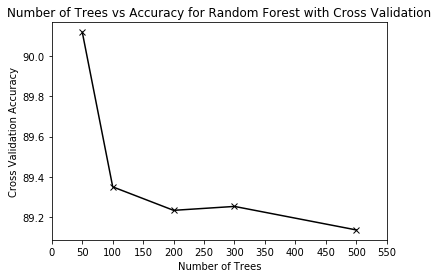

In [10]:
plt.plot(n_est,validation_accuracies_random_forest,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Cross Validation Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation')
plt.xticks(np.arange(0,600,50))
plt.show()

## Random Forest on Test Set Data

In [12]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, y_pred_rf,normalize = False)
    random_forest_accuracy_rate = random_forest_accuracy/(len(y_test)) * 100
    test_set_accuracies_random_forest.append(random_forest_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_rf,average = 'weighted')
    print(f'Number of Trees : {n: >{4}}  Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(random_forest_accuracy_rate,3):>{5}}')

Number of Trees :   50  Precision : 0.628 / Recall :0.598/ Accuracy : 59.822
Number of Trees :  100  Precision : 0.655 / Recall :0.611/ Accuracy : 61.073
Number of Trees :  200  Precision : 0.656 / Recall :0.621/ Accuracy : 62.101
Number of Trees :  300  Precision : 0.663 / Recall :0.623/ Accuracy : 62.267
Number of Trees :  500  Precision : 0.651 / Recall :0.613/ Accuracy : 61.323


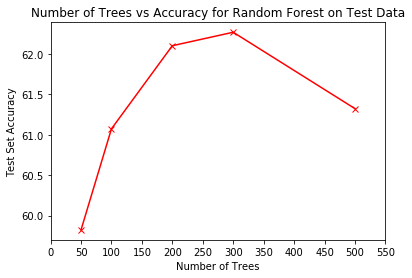

In [14]:
plt.plot(n_est,test_set_accuracies_random_forest,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest on Test Data')
plt.xticks(np.arange(0,600,50))
plt.show()

## Random Forest with PCA

In [15]:
n_components = [16,32,48,64]
for n in n_components:    
    pca = PCA(n_components = n)
    X_train_transform = pca.fit_transform(X_train)
    X_test_transform = pca.transform(X_test)
    rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
    rf.fit(X_train_transform , y_train)
    y_pred = rf.predict(X_test_transform)
    PCA_Accuracy = accuracy_score(y_test, y_pred,normalize = False)
    accuracy = PCA_Accuracy/(len(y_test))*100
    print(f'Accuracy of the Model with Principal Components {n} is {round(accuracy,3):>{5}}')

Accuracy of the Model with Principal Components 16 is 60.183
Accuracy of the Model with Principal Components 32 is 59.878
Accuracy of the Model with Principal Components 48 is 65.463
Accuracy of the Model with Principal Components 64 is 58.961


In [16]:
pca = PCA(n_components = 48)
X_train_transform_pca = pca.fit_transform(X_train)
X_test_transform_pca = pca.transform(X_test)

## Random Forest with Cross Validation and PCA

In [17]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest_pca = []
for n in n_est:
    rf_pca = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf_pca.fit(X_train_transform_pca, y_train)
    x = cross_val_score(estimator = rf_pca, X = X_train_transform_pca, y = y_train,cv=3).mean()*100
    validation_accuracies_random_forest_pca.append(x)
    print(f'Accuracy for {n: >{3}} trees is {np.round(x,3):>{5}}')

Accuracy for  50 trees is 90.554
Accuracy for 100 trees is 89.787
Accuracy for 200 trees is 91.467
Accuracy for 300 trees is 91.36
Accuracy for 500 trees is 91.244


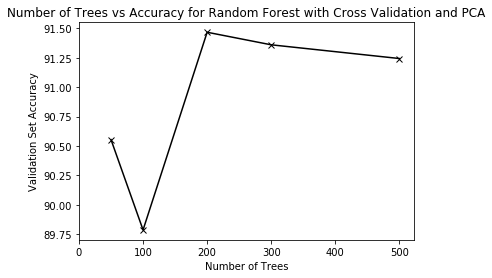

In [18]:
plt.plot(n_est,validation_accuracies_random_forest_pca,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Validation Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation and PCA')
plt.xticks(np.arange(0,600,100))
plt.show()

## Random Forest with PCA on Test Set Data

In [19]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest_pca = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train_transform_pca, y_train)
    y_pred = rf.predict(X_test_transform_pca)
    random_forest_accuracy_pca = accuracy_score(y_test, y_pred,normalize = False)
    random_forest_accuracy_rate_pca = random_forest_accuracy_pca/(len(y_test)) * 100
    test_set_accuracies_random_forest_pca.append(random_forest_accuracy_rate_pca)
    print(f'Accuracy of model with {n: >{3}} trees is {round(random_forest_accuracy_rate_pca,3)}')

Accuracy of model with  50 trees is 65.852
Accuracy of model with 100 trees is 64.407
Accuracy of model with 200 trees is 63.212
Accuracy of model with 300 trees is 62.267
Accuracy of model with 500 trees is 61.434


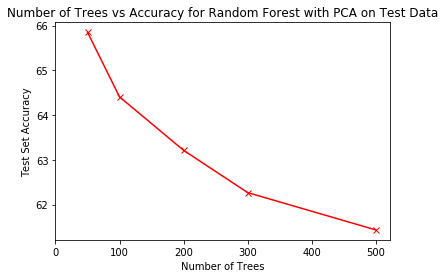

In [20]:
plt.plot(n_est,test_set_accuracies_random_forest_pca,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with PCA on Test Data')
plt.xticks(np.arange(0,600,100))
plt.show()

## SVM with Grid Search and Cross Validation

In [25]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
parameters = {'C': [1,10,50,100,500,1000], 'kernel': ['linear','rbf'],'decision_function_shape' : ['ovo','ovr'],
              'gamma' : ['scale','auto']}  
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv=3)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')      
              

Best Set of HyperParameters is {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy of the Best Model is 0.9390350451412485


In [21]:
C = [1,10,50,100,500,1000]
validation_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    x = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=3).mean()*100
    validation_accuracies_svc.append(x)
    print(f'Accuracy with Penalty Parameter {i:>{4}} is {round(x,3):{5}}') 

Accuracy with Penalty Parameter    1 is 92.244
Accuracy with Penalty Parameter   10 is 93.904
Accuracy with Penalty Parameter   50 is 93.904
Accuracy with Penalty Parameter  100 is 93.069
Accuracy with Penalty Parameter  500 is 92.127
Accuracy with Penalty Parameter 1000 is 92.049


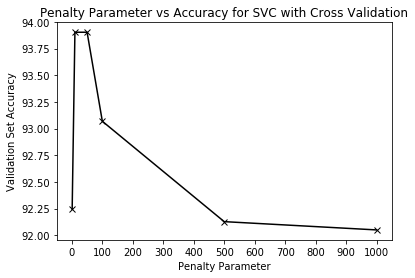

In [22]:
plt.plot(C,validation_accuracies_svc,'k-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Validation Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC with Cross Validation')
plt.xticks(np.arange(0,1100,100))
plt.show()

## SVC on Test Data

In [23]:
C = [1,10,50,100,500,1000]
test_set_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    svc_accuracy = accuracy_score(y_test, y_pred_svc,normalize = False)
    svc_accuracy_rate = svc_accuracy/(len(y_test)) * 100
    test_set_accuracies_svc.append(svc_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_svc,average = 'weighted')
    print(f'Penalty Parameter C : {i: >{4}}  Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(svc_accuracy_rate,3):{5}}')

Penalty Parameter C :    1  Precision : 0.717 / Recall :0.669/ Accuracy : 66.88
Penalty Parameter C :   10  Precision : 0.795 / Recall :0.729/ Accuracy : 72.937
Penalty Parameter C :   50  Precision : 0.786 / Recall :0.719/ Accuracy : 71.853
Penalty Parameter C :  100  Precision : 0.785 / Recall :0.725/ Accuracy : 72.548
Penalty Parameter C :  500  Precision : 0.764 / Recall :0.714/ Accuracy : 71.353
Penalty Parameter C : 1000  Precision : 0.755 / Recall :0.706/ Accuracy : 70.631


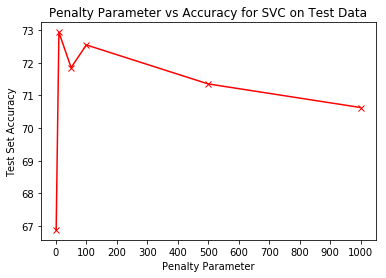

In [24]:
plt.plot(C,test_set_accuracies_svc,'r-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Test Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC on Test Data')
plt.xticks(np.arange(0,1100,100))
plt.show()

## Gradient Boosting with Grid Search CV

In [8]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
# Parameters to Evaluate to find which set of hyperparameters work the best
param = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.01,0.1]
}
gs = GridSearchCV(gb,param,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
best_accuracy = gs.best_score_ 
best_parameters = gs.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')  


Best Set of HyperParameters is {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy of the Best Model is 0.8779730123289001


In [10]:
validation_accuracies_gradient_boosting = []
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
x = cross_val_score(estimator = gb, X = X_train, y = y_train,cv=3).mean()*100
validation_accuracies_gradient_boosting.append(x)
print(f'Accuracy for 500 trees is {x}')

Accuracy for 500 trees is 87.79689949598445


In [15]:
test_set_accuracies_gb = []
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb,normalize = False)
gb_accuracy_rate = gb_accuracy/(len(y_test)) * 100
test_set_accuracies_gb.append(gb_accuracy_rate)
precision,recall,fscore,support = score(y_test,y_pred_gb,average = 'weighted')
print('n_estimators : {} ------- / --- Precision : {} / Recall :{}/ Accuracy : {}'
        .format(500,np.round(precision,3),np.round(recall,3),np.round(gb_accuracy_rate,3)))

n_estimators : 500 ------- / --- Precision : 0.684 / Recall :0.623/ Accuracy : 62.323
